<br></br>
<b><h2>Phase1: Data analysis & preparation</h2></b>

<br></br>
<b><h2>Importing Python Libraries</h2></b>

In [2]:
import random
from pprint import pprint
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [ ]:
!pip install missingno

<br></br>
<b><h2>Loading the Data</h2></b>

In [3]:
# Load dataset
df = pd.read_csv('riceClassification.csv', delimiter = ',')
print(df.shape)
df.head(10)

(18185, 12)


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
5,6,2990,77.417073,50.954344,0.752861,3080,61.700780,0.584898,216.930,0.798439,1.519342,1
6,7,3556,84.323564,55.413061,0.753762,3636,67.287739,0.750211,227.007,0.867148,1.521727,1
7,8,3788,86.952411,56.444769,0.760664,3866,69.448048,0.800676,235.476,0.858473,1.540487,1
8,9,2629,74.133114,48.074144,0.761228,2790,57.856260,0.640595,207.325,0.768594,1.542058,1
9,10,5719,106.721142,68.977700,0.763053,5819,85.332625,0.754983,281.839,0.904748,1.547183,1


<br></br>
<b><h2>Insights</h2></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
df.describe(include="all")

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [6]:
# df.loc[:, "DeadlineRespected"].value_counts(normalize=True) * 100
df.loc[:, "Class"].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

In [7]:
(df.loc[:, "Class"] == 1).sum()

9985

<br></br>
<b><h2>Data Cleaning</h2></b>

In [8]:
# Check for missing data and duplicates
df.isnull().sum()
# print('Duplicates:', df.duplicated().sum())

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

<AxesSubplot:>

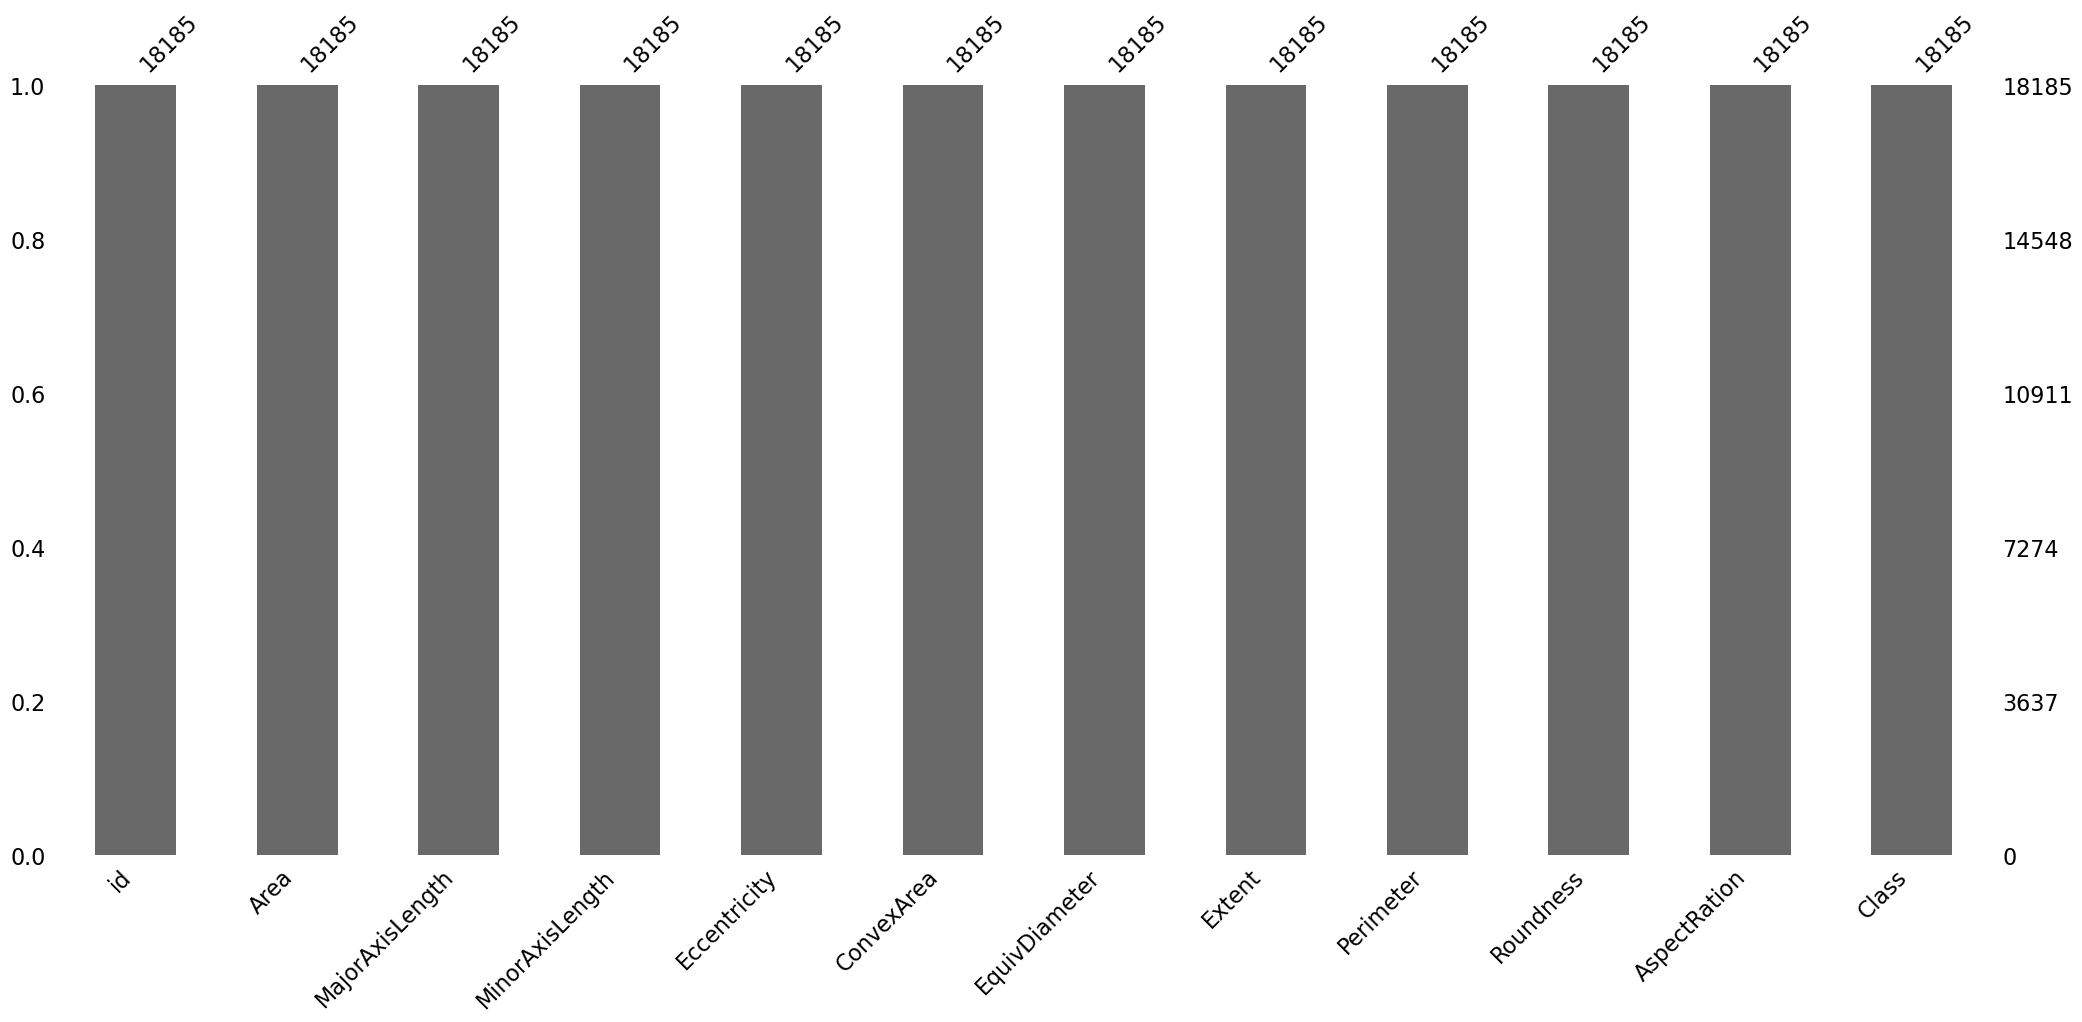

In [9]:
msno.bar(df)

<AxesSubplot:xlabel='Class', ylabel='count'>

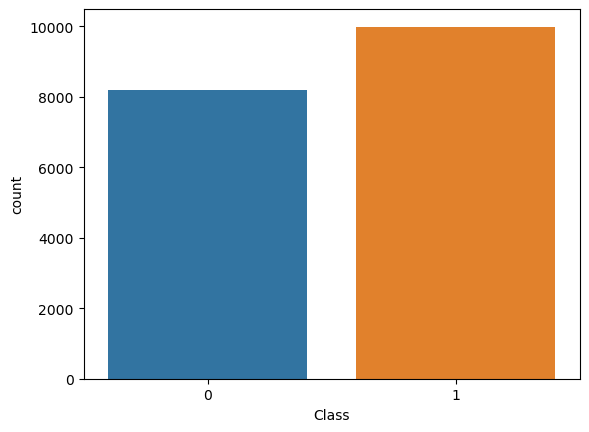

In [10]:
sns.countplot(data = df, x="Class")

In [358]:
# #Increasing the number of data instances - Oversampling
# # assume `X` is the feature matrix and `y` is the target variable
# # `X` has shape (n_samples, n_features) and `y` has shape (n_samples,)
# # `y` contains binary labels (0 for the majority class and 1 for the minority class)
# X = newdf.iloc[:, :-1].values
# y = newdf.iloc[:, -1].values

# # count the number of instances in each class
# n_positive = sum(y)
# # (df.loc[:, "DeadlineRespected"] == 1).sum()
# n_negative = len(y) - n_positive

# print(n_positive)

# # calculate the desired number of positive instances
# # we can set it to be equal to the number of negative instances
# n_desired_positive = n_negative

# # loop through the instances and duplicate the positive ones
# X_resampled = []
# y_resampled = []
# for i in range(len(X)):
#     if y[i] == 1:  # positive instance
#         X_resampled.append(X[i])
#         y_resampled.append(y[i])
#         # duplicate the positive instance until we reach the desired number
#         while len(X_resampled) < n_desired_positive + n_positive:
#             X_resampled.append(X[i])
#             y_resampled.append(y[i])
#     else:  # negative instance
#         X_resampled.append(X[i])
#         y_resampled.append(y[i])

# # shuffle the resampled data
# indices = list(range(len(X_resampled)))
# random.shuffle(indices)
# X_resampled = [X_resampled[i] for i in indices]
# y_resampled = [y_resampled[i] for i in indices]


1470


In [394]:
# df1 = pd.DataFrame(X_resampled)
# df2 = pd.DataFrame(y_resampled)
# df_new = pd.concat([df1, df2], axis=0)
# df_new.reset_index(drop=True, inplace=True)
# print(df_new.shape)
# df_new.head(10)

# df1 = pd.DataFrame(X_resampled, columns=['feature'+str(i) for i in range(pd.DataFrame(X_resampled).shape[1])])
# df2 = pd.DataFrame(y_resampled, columns=['CreditCard'])
# df_new = pd.concat([df1, df2], axis=1)
# df_new.reset_index(drop=True, inplace=True)
# df_new.head(10)

In [11]:
percentage = df.loc[:, "Class"].value_counts(normalize=True) * 100
percentage

1    54.907891
0    45.092109
Name: Class, dtype: float64

<b> Pie chart distribution of DeadlineRespected label </b>

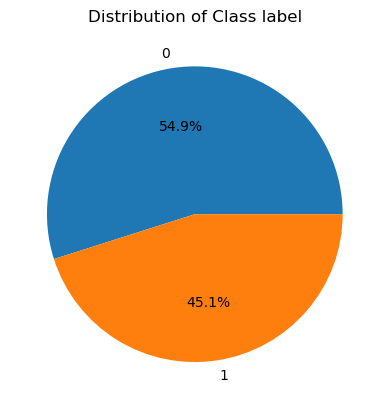

In [13]:
plt.pie(percentage, labels=["0", "1"], autopct = "%1.1f%%")
plt.title("Distribution of Class label")
plt.show()

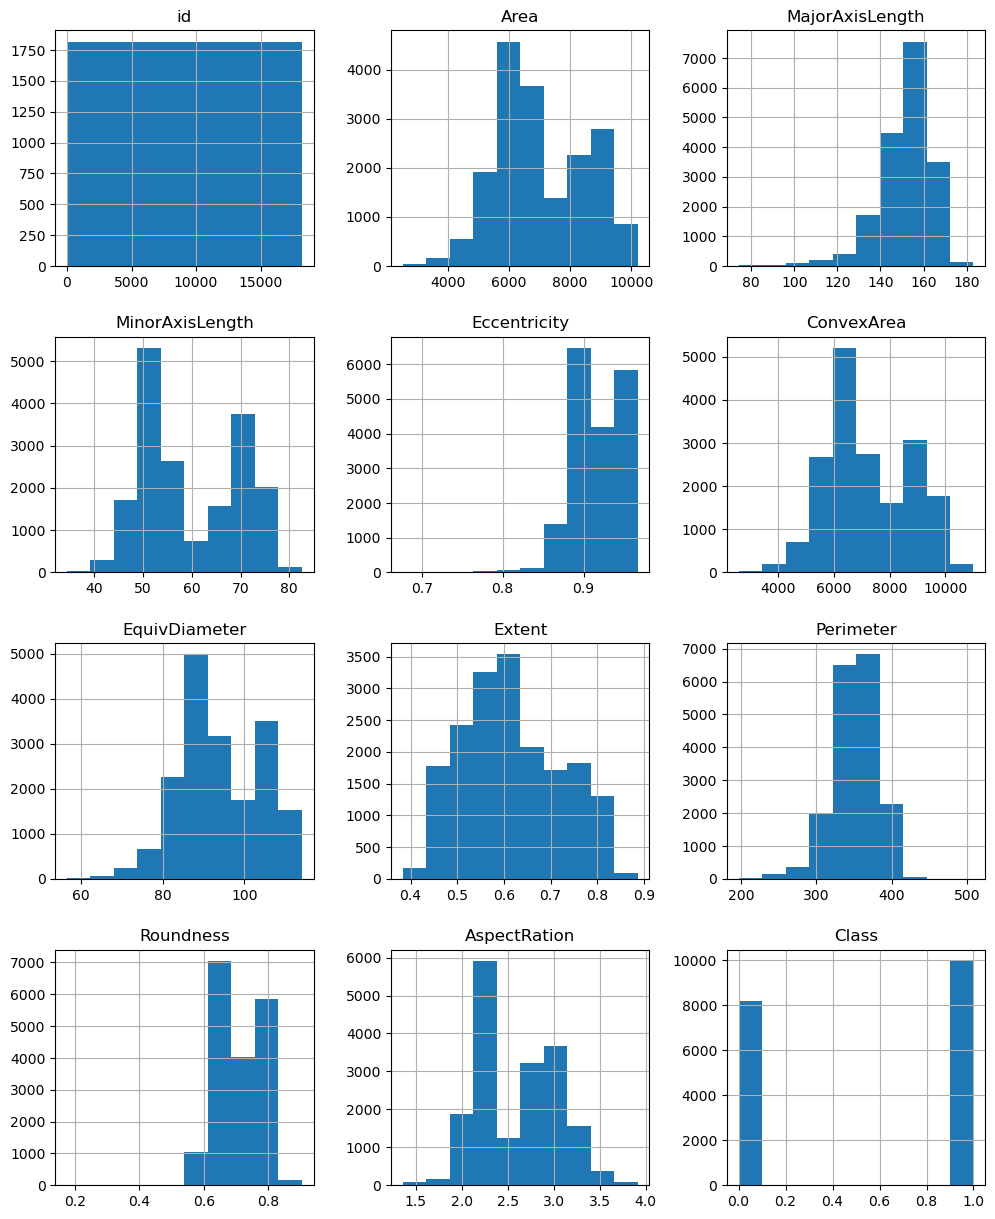

Above mean: 0.5490789111905416
Below mean: 0.45092108880945836


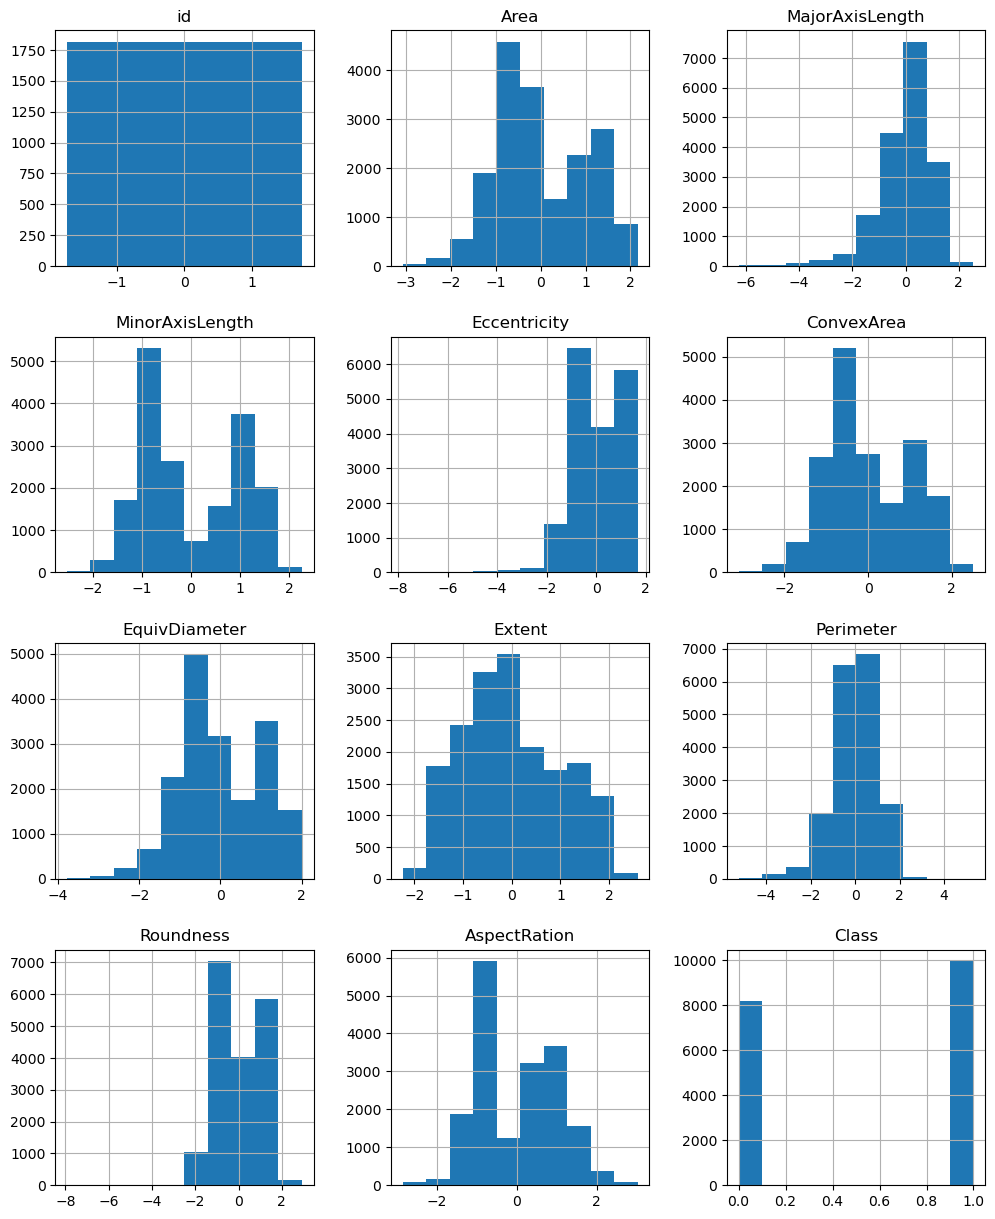

In [16]:
#Visualization before Normalization
df.hist(figsize=(12,15))
plt.show()


# Check balance of output labels
above_mean = (df['Class'] > df['Class'].mean()).sum()
below_mean = len(df) - above_mean
print('Above mean:', above_mean/len(df))
print('Below mean:', below_mean/len(df))

# # Normalize data
# min_val = min(df_new)
# max_val = max(df_new)
    
# # # Calculate the range of the data
# # data_range = max_val - min_val
    
    # Normalize the data
def z_score_normalization(column_name):
    series = df.loc[:, column_name]
    return (series - series.mean())/series.std()
    
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in df.columns:
    if column_name != "Class":
        df[column_name] = z_score_normalization(column_name=column_name)

#Visualization after Normalization
df.hist(figsize=(12,15))
plt.show()


In [17]:
print(df.shape)

(18185, 12)


In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

<br></br>
<b><h2>Phase2: Build a model to overfit the entire dataset</h2></b>

In [23]:
model = Sequential()

model.add(Dense(1, input_dim = df.shape[1] -1, activation = 'relu'))
# model.add(Dense(16, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [24]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# checkpoint_file
# print(model.summary())

In [ ]:
# checkpoint_filepath = 'model_weights.h5'
# checkpoint_callback = ModelCheckpoint(filepath=check)

In [25]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
569/569 [==============================] - 3s 3ms/step - loss: 0.7805 - accuracy: 0.8726
Epoch 2/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0572 - accuracy: 0.9801
Epoch 3/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0278 - accuracy: 0.9952
Epoch 4/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0176 - accuracy: 0.9977
Epoch 5/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0136 - accuracy: 0.9986
Epoch 6/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0107 - accuracy: 0.9991
Epoch 7/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0056 - accuracy: 0.9994
Epoch 8/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0040 - accuracy: 0.9995
Epoch 9/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0034 - accuracy: 0.9995
Epoch 10/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0031 - accuracy: 0.9995

In [26]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=df.shape[1] - 1))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [27]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
569/569 [==============================] - 3s 3ms/step - loss: 0.0514 - accuracy: 0.9946
Epoch 2/50
569/569 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 3/50
569/569 [==============================] - 2s 3ms/step - loss: 4.8397e-04 - accuracy: 0.9999
Epoch 4/50
569/569 [==============================] - 2s 3ms/step - loss: 3.6559e-04 - accuracy: 0.9999
Epoch 5/50
569/569 [==============================] - 2s 3ms/step - loss: 2.9298e-04 - accuracy: 0.9999
Epoch 6/50
569/569 [==============================] - 2s 3ms/step - loss: 2.3991e-04 - accuracy: 0.9999
Epoch 7/50
569/569 [==============================] - 2s 3ms/step - loss: 2.5822e-04 - accuracy: 0.9999
Epoch 8/50
569/569 [==============================] - 2s 3ms/step - loss: 1.6568e-04 - accuracy: 0.9999
Epoch 9/50
569/569 [==============================] - 2s 3ms/step - loss: 1.8083e-04 - accuracy: 0.9999
Epoch 10/50
569/569 [==============================] - 2s 3ms/step - los